# Sensitivity based on sequence of conditioning

## The method
In this example, we analyse the sensitivity of the output model with respect to its inputs. Let $Y=g(\boldsymbol{X})$ be the scalar output of 
the model $g$ with vector input $\boldsymbol{X}$ with dimension $n_x \in \mathbb{N}$. 
Let $a < b$ be two real numbers. 
We consider the event $\{a \leq Y < b\}$. 
We want to compute the sensitivity of that event with respect to each input $X_i$ for $i = 1, ..., n_x$. 

This script computes the conditional distribution of the input Xi given that the output $Y$ is
in the interval $[a, b]$ for $i=1,...,n_x$. 
Compare that conditional distribution with 
the unconditional distribution of Xi: if there is no difference, 
then the input Xi is not influential for that event.

Selecting one particular event can be, however, difficult in some cases. This is especially more difficult when we are interested on the central dispersion of the output. In this case, it might be interesting to consider not only one single quantile level, but several. For example, if we consider 5 different splits of the distribution of the output, it leads to the quantile levels $[0,0.2]$, $[0.2,0.4]$, $[0.4,0.6]$, $[0.6,0.8]$ and $[0.8,1]$. This way, the entire range of the output is considered.

We consider the same model presented in `demo_plot_event.ipynb`.

In [1]:
import otsensitivity as ots
import openturns as ot
import openturns.viewer as otv
from matplotlib import pylab as plt
import numpy as np
import pylab as pl

## Python script

The next cell defines the flood model. 

In [2]:
def getFloodingInputDistribution():
    """
    Return the input distribution of the model.

    Return
    ------
    inputDistribution: ot.ComposedDistribution(4)
        The input distribution of the model
    """
    dist_Q = ot.Gumbel(558.0, 1013.0)
    dist_Q = ot.TruncatedDistribution(dist_Q, 0)
    dist_Q.setDescription(["Q"])
    dist_Ks = ot.Normal(30, 7.5)
    dist_Ks = ot.TruncatedDistribution(dist_Ks, 0)
    dist_Ks.setDescription(["Ks"])
    dist_Zv = ot.Uniform(49.0, 51.0)
    dist_Zv.setDescription(["Zv"])
    dist_Zm = ot.Uniform(54.0, 56.0)
    dist_Zm.setDescription(["Zm"])
    inputDistribution = ot.ComposedDistribution([dist_Q, dist_Ks, dist_Zv, dist_Zm])
    return inputDistribution


def getFloodingSample(sampleSize):
    """
    Return a sample from the physical model.

    Parameters
    ----------
    sampleSize: int
        The sample size.

    Return
    ------
    inputSample: ot.Sample(sampleSize, inputDimension)
        The input sample.
    outputSample: ot.Sample(sampleSize, outputDimension)
        The output sample.
    """
    # Workaround for https://github.com/openturns/openturns/pull/2358
    physicalModel = ot.SymbolicFunction(
        ["Q", "Ks", "Zv", "Zm"],
        ["H", "S"],
        "H := (Q / (Ks * 300.0 * sqrt((Zm - Zv) / 5000.0)))^(3.0 / 5.0); S := H + Zv - 58.5",
    )

    inputDistribution = getFloodingInputDistribution()
    inputSample = inputDistribution.getSample(sampleSize)
    outputSample = physicalModel(inputSample)
    return inputSample, outputSample

Then we generate a sample from this model. The sensitivity analysis method that we present in this example only uses a pair of (X, Y) samples.

In [3]:
ot.Log.Show(ot.Log.NONE)

sampleSize = 1000

inputSample, outputSample = getFloodingSample(sampleSize)
inputSample[:5]

,Q,Ks,Zv,Zm
0,1443.603,28.7113,50.38435,54.87103
1,2174.89,25.40898,50.59971,55.89556
2,626.1024,33.24892,49.84856,54.90653
3,325.8124,39.44916,50.66521,54.51094
4,981.3994,13.86486,49.98321,55.91527


In [4]:
outputSample[:5]

,H,S
0,2.809813,-5.305838
1,3.678812,-4.221473
2,1.503647,-7.147793
3,0.9955951,-6.83919
4,3.172596,-5.344195


We chose to select the output depending on a quantile of the input. We condition on the inputs which lead to the output being larger than its 50%, 70% and 90% quantile.

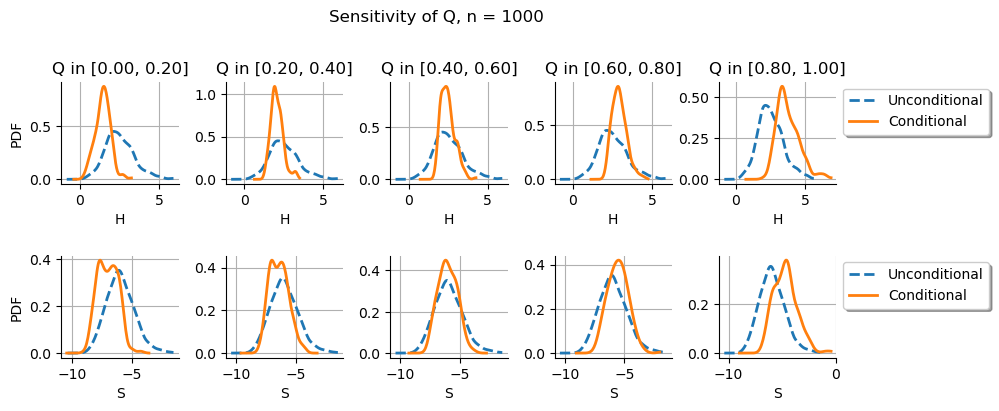

In [5]:
inputMarginalIndex = 0  # See the sensitivity with respect to Q
grid = ots.plotConditionInputAll(
    inputSample,
    outputSample,
    inputMarginalIndex,
)
view = otv.View(
    grid,
    figure_kw={"figsize": (10.0, 4.0)},
    legend_kw={"bbox_to_anchor": (1.0, 1.0), "loc": "upper left"},
)
pl.subplots_adjust(wspace=0.4, top=0.8, hspace=0.7)

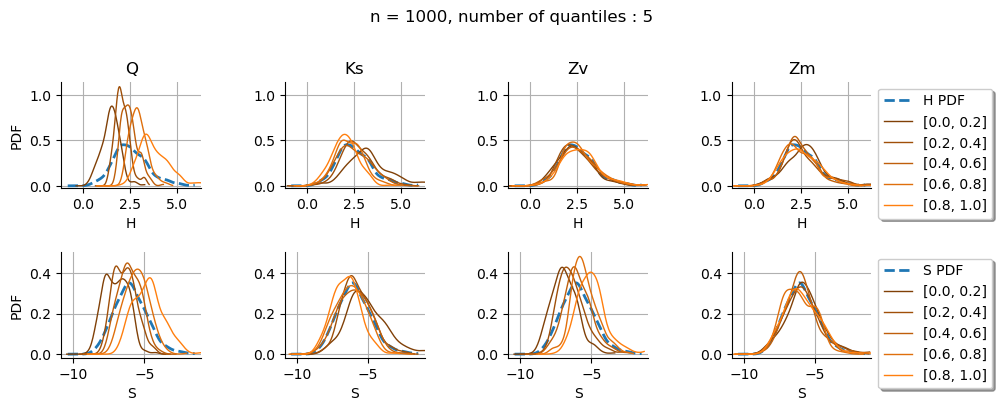

In [6]:
grid = ots.plotConditionOnInputQuantileSequence(inputSample, outputSample)
view = otv.View(
    grid,
    figure_kw={"figsize": (12.0, 4.0)},
    legend_kw={"bbox_to_anchor": (1.0, 1.0), "loc": "upper left"},
)
pl.subplots_adjust(wspace=0.6, right=0.8, top=0.8, hspace=0.6)